## Goal

* In this particular dataset, I'm going to be extracting Countries and their information and storing them in their respective continent dataframe.

The purpose of this is to be able to visualise a particular continent, and see which country in that continent had lowest to highest death rate. I also want to know the leading cancer death by type in each location.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings(action='ignore')

## Importing/Reading the dataset

In [2]:
cdr=pd.read_csv('total-cancer-deaths-by-type.csv')
cdr

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number),Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number),Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number),Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number),Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Zimbabwe,ZWE,2015,948,59,145,902,149,87,125,...,104,96,426,988,11,53,40,719,39,16
8006,Zimbabwe,ZWE,2016,966,61,150,932,153,89,129,...,109,100,449,1012,11,54,42,744,40,17
8007,Zimbabwe,ZWE,2017,982,63,154,960,156,91,133,...,112,102,471,1035,12,56,43,767,41,17
8008,Zimbabwe,ZWE,2018,998,66,159,993,160,92,137,...,115,105,495,1059,12,57,44,792,43,17


## Data Information

In [3]:
cdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 32 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Entity                                                                                 8010 non-null   object
 1   Code                                                                                   6150 non-null   object
 2   Year                                                                                   8010 non-null   int64 
 3   Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)                             8010 non-null   int64 
 4   Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)                            8010 non-null   int64 
 5   Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)           

## Renaming The Headers

In [4]:
header_names=['Entity','Code','Year','Liver Cancer','Kidney Cancer','Lip and oral cavity cancer','Tracheal, bronchus, and lung cancer',
             'Larynx Cancer','Gallbladder and biliary tract cancer','Malignant Skin Cancer','Leukemia','Hodgkin Lymphoma','Multiple Myeloma',
             'Other Neoplasms','Breast Cancer','Prostrate Cancer','Thyroid Cancer','Stomach Cancer','Bladder Cancer','Uterine Cancer','Ovarian Cancer',
             'Cervical Cancer','Brain and central nervous system cancer','Non-Hodgkin Lymphoma','Pancreatic Cancer','Esophageal Cancer','Testicular Cancer',
             'Nasopharynx Cancer','Other Pharynx Cancer',' Colon and rectum cancer','Non-melanoma skin cancer','Mesothelioma']
cdr=pd.read_csv('total-cancer-deaths-by-type.csv', header=None,skiprows=1,names=header_names)
cdr

,Entity,Code,Year,Liver Cancer,Kidney Cancer,Lip and oral cavity cancer,"Tracheal, bronchus, and lung cancer",Larynx Cancer,Gallbladder and biliary tract cancer,Malignant Skin Cancer,...,Brain and central nervous system cancer,Non-Hodgkin Lymphoma,Pancreatic Cancer,Esophageal Cancer,Testicular Cancer,Nasopharynx Cancer,Other Pharynx Cancer,Colon and rectum cancer,Non-melanoma skin cancer,Mesothelioma
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Zimbabwe,ZWE,2015,948,59,145,902,149,87,125,...,104,96,426,988,11,53,40,719,39,16
8006,Zimbabwe,ZWE,2016,966,61,150,932,153,89,129,...,109,100,449,1012,11,54,42,744,40,17
8007,Zimbabwe,ZWE,2017,982,63,154,960,156,91,133,...,112,102,471,1035,12,56,43,767,41,17
8008,Zimbabwe,ZWE,2018,998,66,159,993,160,92,137,...,115,105,495,1059,12,57,44,792,43,17


## Creating a new column (Total)

This is to get the total number of number of a particular country in each column

In [5]:
cdr['Total']=cdr.iloc[:,3:32].sum(axis=1)#iloc function locates rows and features by their indexes (';' specifies all rows, while '3:32' specifies column 3 to column 32. when counting columns, we always start count from zero(0))
cdr

,Entity,Code,Year,Liver Cancer,Kidney Cancer,Lip and oral cavity cancer,"Tracheal, bronchus, and lung cancer",Larynx Cancer,Gallbladder and biliary tract cancer,Malignant Skin Cancer,...,Non-Hodgkin Lymphoma,Pancreatic Cancer,Esophageal Cancer,Testicular Cancer,Nasopharynx Cancer,Other Pharynx Cancer,Colon and rectum cancer,Non-melanoma skin cancer,Mesothelioma,Total
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,996,138,529,3,66,37,539,25,6,10386
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,1010,137,535,4,67,37,542,26,7,10558
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,1040,137,546,4,69,38,550,26,7,10894
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,1062,139,560,5,72,39,555,27,7,11241
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,1069,140,575,5,73,39,554,28,8,11484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Zimbabwe,ZWE,2015,948,59,145,902,149,87,125,...,96,426,988,11,53,40,719,39,16,10735
8006,Zimbabwe,ZWE,2016,966,61,150,932,153,89,129,...,100,449,1012,11,54,42,744,40,17,11028
8007,Zimbabwe,ZWE,2017,982,63,154,960,156,91,133,...,102,471,1035,12,56,43,767,41,17,11291
8008,Zimbabwe,ZWE,2018,998,66,159,993,160,92,137,...,105,495,1059,12,57,44,792,43,17,11575


## Checking unique values in the Entity column

In [6]:
cdr.Entity.unique()

array(['Afghanistan', 'Africa', 'African Region', 'African Union',
       'Albania', 'Algeria', 'America', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Asia', 'Australasia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Commonwealth',
       'Commonwealth High Income', 'Commonwealth Low Income',
       'Commonwealth Middle Income', 'Comoros', 'Congo', 'Cook Islands',
       '

We are going to be creating dataframe for countries only.

Apart from the countries present, the 'Entity' column also contains continents like; Africa, Asia, Europe, North America, Oceania.

We also have groups like; World(all continents), World Bank High Income/Low Income, World Bank Lower/Upper Middle Income,OECD Countries, Caribbean, Commonwealth, Commonwealth High/Low/Middle income, etc.

when we create the dataframe, we will have just countries in the Entity column, from there we would create dataframes for World, Africa, Asia, Oceania, Europe, South America and North America.

## Creating a DataFrame for all countries and name it World and save it as csv

In [7]:
a1=cdr.loc[cdr['Entity']=='Afghanistan']
a2=cdr.loc[cdr['Entity']=='Albania']
a3=cdr.loc[cdr['Entity']=='Algeria']
a4=cdr.loc[cdr['Entity']=='America Samoa']
a5=cdr.loc[cdr['Entity']=='Andorra']
a6=cdr.loc[cdr['Entity']=='Angola']
a7=cdr.loc[cdr['Entity']=='Antigua and Barbuda']
a8=cdr.loc[cdr['Entity']=='Argentina']
a9=cdr.loc[cdr['Entity']=='Armenia']
a10=cdr.loc[cdr['Entity']=='Australia']
a11=cdr.loc[cdr['Entity']=='Austria']
a12=cdr.loc[cdr['Entity']=='Azerbaijan']
b1=cdr.loc[cdr['Entity']=='Bahamas']
b2=cdr.loc[cdr['Entity']=='Bahrain']
b3=cdr.loc[cdr['Entity']=='Bangladesh']
b4=cdr.loc[cdr['Entity']=='Barbados']
b5=cdr.loc[cdr['Entity']=='Belarus']
b6=cdr.loc[cdr['Entity']=='Belgium']
b7=cdr.loc[cdr['Entity']=='Belize']
b8=cdr.loc[cdr['Entity']=='Benin']
b9=cdr.loc[cdr['Entity']=='Bermuda']
b10=cdr.loc[cdr['Entity']=='Bhutan']
b11=cdr.loc[cdr['Entity']=='Bolivia']
b12=cdr.loc[cdr['Entity']=='Bosnia and Herzegovina']
b13=cdr.loc[cdr['Entity']=='Botswana']
b14=cdr.loc[cdr['Entity']=='Brazil']
b15=cdr.loc[cdr['Entity']=='Brunei']
b16=cdr.loc[cdr['Entity']=='Bulgaria']
b17=cdr.loc[cdr['Entity']=='Burkina Faso']
b18=cdr.loc[cdr['Entity']=='Burundi']
c1=cdr.loc[cdr['Entity']=='Cambodia']
c2=cdr.loc[cdr['Entity']=='Cameroon']
c3=cdr.loc[cdr['Entity']=='Canada']
c4=cdr.loc[cdr['Entity']=='Cape Verde']
c5=cdr.loc[cdr['Entity']=='Central African Republic']
c6=cdr.loc[cdr['Entity']=='Chad']
c7=cdr.loc[cdr['Entity']=='Chile']
c8=cdr.loc[cdr['Entity']=='China']
c9=cdr.loc[cdr['Entity']=='Colombia']
c10=cdr.loc[cdr['Entity']=='Comoros']
c11=cdr.loc[cdr['Entity']=='Congo']
c12=cdr.loc[cdr['Entity']=='Cook Islands']
c13=cdr.loc[cdr['Entity']=='Costa Rica']
c14=cdr.loc[cdr['Entity']=="Cote d'Ivoire"]
c15=cdr.loc[cdr['Entity']=='Croatia']
c16=cdr.loc[cdr['Entity']=='Cuba']
c17=cdr.loc[cdr['Entity']=='Cyprus']
c18=cdr.loc[cdr['Entity']=='Czechia']
d1=cdr.loc[cdr['Entity']=='Democratic Republic of Congo']
d2=cdr.loc[cdr['Entity']=='Denmark']
d3=cdr.loc[cdr['Entity']=='Djibouti']
d4=cdr.loc[cdr['Entity']=='Dominica']
d5=cdr.loc[cdr['Entity']=='Dominican Republic']
e1=cdr.loc[cdr['Entity']=='Ecuador']
e2=cdr.loc[cdr['Entity']=='Egypt']
e3=cdr.loc[cdr['Entity']=='El Salvador']
e4=cdr.loc[cdr['Entity']=='Equatorial Guinea']
e5=cdr.loc[cdr['Entity']=='Eritrea']
e6=cdr.loc[cdr['Entity']=='Estonia']
e7=cdr.loc[cdr['Entity']=='Eswatini']
e8=cdr.loc[cdr['Entity']=='Ethiopia']
f1=cdr.loc[cdr['Entity']=='Fiji']
f2=cdr.loc[cdr['Entity']=='Finland']
f3=cdr.loc[cdr['Entity']=='France']
g1=cdr.loc[cdr['Entity']=='Gabon']
g2=cdr.loc[cdr['Entity']=='Gambia']
g3=cdr.loc[cdr['Entity']=='Georgia']
g4=cdr.loc[cdr['Entity']=='Germany']
g5=cdr.loc[cdr['Entity']=='Greece']
g6=cdr.loc[cdr['Entity']=='Greenland']
g7=cdr.loc[cdr['Entity']=='Grenada']
g8=cdr.loc[cdr['Entity']=='Guam']
g9=cdr.loc[cdr['Entity']=='Guatemala']
g10=cdr.loc[cdr['Entity']=='Guinea']
g11=cdr.loc[cdr['Entity']=='Guinea-Bissau']
g12=cdr.loc[cdr['Entity']=='Guyana']
g13=cdr.loc[cdr['Entity']=='Ghana']
h1=cdr.loc[cdr['Entity']=='Haiti']
h2=cdr.loc[cdr['Entity']=='Honduras']
h3=cdr.loc[cdr['Entity']=='Hungary']
i1=cdr.loc[cdr['Entity']=='Iceland']
i2=cdr.loc[cdr['Entity']=='India']
i3=cdr.loc[cdr['Entity']=='Indonesia']
i4=cdr.loc[cdr['Entity']=='Iran']
i5=cdr.loc[cdr['Entity']=='Iraq']
i6=cdr.loc[cdr['Entity']=='Ireland']
i7=cdr.loc[cdr['Entity']=='Israel']
i8=cdr.loc[cdr['Entity']=='Italy']
j1=cdr.loc[cdr['Entity']=='Jamaica']
j2=cdr.loc[cdr['Entity']=='Japan']
j3=cdr.loc[cdr['Entity']=='Jordan']
k1=cdr.loc[cdr['Entity']=='Kazakhstan']
k2=cdr.loc[cdr['Entity']=='Kenya']
k3=cdr.loc[cdr['Entity']=='Kiribati']
k4=cdr.loc[cdr['Entity']=='Kyrgyzstan']
k5=cdr.loc[cdr['Entity']=='Kuwait']
l1=cdr.loc[cdr['Entity']=='Laos']
l2=cdr.loc[cdr['Entity']=='Lativia']
l3=cdr.loc[cdr['Entity']=='Lebanon']
l4=cdr.loc[cdr['Entity']=='Lesotho']
l5=cdr.loc[cdr['Entity']=='Liberia']
l6=cdr.loc[cdr['Entity']=='Libya']
l7=cdr.loc[cdr['Entity']=='Lithuania']
l8=cdr.loc[cdr['Entity']=='Luxembourg']
m1=cdr.loc[cdr['Entity']=='Madagascar']
m2=cdr.loc[cdr['Entity']=='Malawi']
m3=cdr.loc[cdr['Entity']=='Malaysia']
m4=cdr.loc[cdr['Entity']=='Maldives']
m5=cdr.loc[cdr['Entity']=='Mali']
m6=cdr.loc[cdr['Entity']=='Malta']
m7=cdr.loc[cdr['Entity']=='Marshall Islands']
m8=cdr.loc[cdr['Entity']=='Mauritania']
m9=cdr.loc[cdr['Entity']=='Mauritius']
m10=cdr.loc[cdr['Entity']=='Mexico']
m11=cdr.loc[cdr['Entity']=='Micronesia (country)']
m12=cdr.loc[cdr['Entity']=='Monaco']
m13=cdr.loc[cdr['Entity']=='Mongolia']
m14=cdr.loc[cdr['Entity']=='Montenegro']
m15=cdr.loc[cdr['Entity']=='Morocco']
m16=cdr.loc[cdr['Entity']=='Mozambique']
m17=cdr.loc[cdr['Entity']=='Myanmar']
m18=cdr.loc[cdr['Entity']=='Moldova']
n1=cdr.loc[cdr['Entity']=='Namibia']
n2=cdr.loc[cdr['Entity']=='Nauru']
n3=cdr.loc[cdr['Entity']=='Nepal']
n4=cdr.loc[cdr['Entity']=='Netherlands']
n5=cdr.loc[cdr['Entity']=='New Zealand']
n6=cdr.loc[cdr['Entity']=='Nicaragua']
n7=cdr.loc[cdr['Entity']=='Niger']
n8=cdr.loc[cdr['Entity']=='Nigeria']
n9=cdr.loc[cdr['Entity']=='Niue']
n10=cdr.loc[cdr['Entity']=='North Korea']
n11=cdr.loc[cdr['Entity']=='North Macedonia']
n12=cdr.loc[cdr['Entity']=='Northern Mariana Islands']
n13=cdr.loc[cdr['Entity']=='Norway']
o1=cdr.loc[cdr['Entity']=='Oman']
p1=cdr.loc[cdr['Entity']=='Pakistan']
p2=cdr.loc[cdr['Entity']=='Palau']
p3=cdr.loc[cdr['Entity']=='Palestine']
p4=cdr.loc[cdr['Entity']=='Panama']
p5=cdr.loc[cdr['Entity']=='Papua New Guinea']
p6=cdr.loc[cdr['Entity']=='Paraguay']
p7=cdr.loc[cdr['Entity']=='Peru']
p8=cdr.loc[cdr['Entity']=='Philippines']
p9=cdr.loc[cdr['Entity']=='Poland']
p10=cdr.loc[cdr['Entity']=='Portugal']
p11=cdr.loc[cdr['Entity']=='Puerto Rico']
q1=cdr.loc[cdr['Entity']=='Qatar']
r1=cdr.loc[cdr['Entity']=='Romania']
r2=cdr.loc[cdr['Entity']=='Russia']
r3=cdr.loc[cdr['Entity']=='Rwanda']
s1=cdr.loc[cdr['Entity']=='Saint Kitts and Nevis']
s2=cdr.loc[cdr['Entity']=='Saint Lucia']
s3=cdr.loc[cdr['Entity']=='Saint Vincent and the Grenadines']
s4=cdr.loc[cdr['Entity']=='Samoa']
s5=cdr.loc[cdr['Entity']=='San Marino']
s6=cdr.loc[cdr['Entity']=='Sao Tome and Principe']
s7=cdr.loc[cdr['Entity']=='Saudi Arabia']
s8=cdr.loc[cdr['Entity']=='Scotland']
s9=cdr.loc[cdr['Entity']=='Senegal']
s10=cdr.loc[cdr['Entity']=='Serbia']
s11=cdr.loc[cdr['Entity']=='Seychelles']
s12=cdr.loc[cdr['Entity']=='Sierra Leone']
s13=cdr.loc[cdr['Entity']=='Singapore']
s14=cdr.loc[cdr['Entity']=='Slovakia']
s15=cdr.loc[cdr['Entity']=='Slovenia']
s16=cdr.loc[cdr['Entity']=='Solomon Islands']
s17=cdr.loc[cdr['Entity']=='Somalia']
s18=cdr.loc[cdr['Entity']=='South Africa']
s19=cdr.loc[cdr['Entity']=='South Korea']
s20=cdr.loc[cdr['Entity']=='South Sudan']
s21=cdr.loc[cdr['Entity']=='Spain']
s22=cdr.loc[cdr['Entity']=='Sri Lanka']
s23=cdr.loc[cdr['Entity']=='Sudan']
s24=cdr.loc[cdr['Entity']=='Suriname']
s25=cdr.loc[cdr['Entity']=='Sweden']
s26=cdr.loc[cdr['Entity']=='Switzerland']
s27=cdr.loc[cdr['Entity']=='Syria']
t1=cdr.loc[cdr['Entity']=='Taiwan']
t2=cdr.loc[cdr['Entity']=='Tajikistan']
t3=cdr.loc[cdr['Entity']=='Tanzania']
t4=cdr.loc[cdr['Entity']=='Thailand']
t5=cdr.loc[cdr['Entity']=='Timor']
t6=cdr.loc[cdr['Entity']=='Togo']
t7=cdr.loc[cdr['Entity']=='Tokelau']
t8=cdr.loc[cdr['Entity']=='Tonga']
t9=cdr.loc[cdr['Entity']=='Trinidad and Tobago']
t10=cdr.loc[cdr['Entity']=='Tunisia']
t11=cdr.loc[cdr['Entity']=='Turkey']
t12=cdr.loc[cdr['Entity']=='Turkmenistan']
t13=cdr.loc[cdr['Entity']=='Tuvalu']
u1=cdr.loc[cdr['Entity']=='Uganda']
u2=cdr.loc[cdr['Entity']=='Ukraine']
u3=cdr.loc[cdr['Entity']=='United Arab Emirates']
u4=cdr.loc[cdr['Entity']=='United Kingdom']
u5=cdr.loc[cdr['Entity']=='United States']
u6=cdr.loc[cdr['Entity']=='Uruguay']
u7=cdr.loc[cdr['Entity']=='Uzbekistan']
v1=cdr.loc[cdr['Entity']=='Vanuatu']
v2=cdr.loc[cdr['Entity']=='Venezuela']
v3=cdr.loc[cdr['Entity']=='Vietnam']
y1=cdr.loc[cdr['Entity']=='Yemen']
z1=cdr.loc[cdr['Entity']=='Zambia']
z2=cdr.loc[cdr['Entity']=='Zimbabwe']
World=pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,
                    c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,d1,d2,d3,d4,d5,e1,e2,e3,e4,e5,e6,e7,e8,
                    f1,f2,f3,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,h1,h2,h3,i1,i2,i3,i4,i5,i6,i7,i8,j1,j2,j3,k1,k2,k3,k4,k5,
                    l1,l2,l3,l4,l5,l6,l7,l8,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,n1,n2,n3,n4,n5,n6,n7,n8,
                    n9,n10,n11,n12,n13,o1,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,q1,r1,r2,r3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,
                    s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,
                    u1,u2,u3,u4,u5,u6,u7,v1,v2,v3,y1,z1,z2],axis=0,ignore_index=True)
World

,Entity,Code,Year,Liver Cancer,Kidney Cancer,Lip and oral cavity cancer,"Tracheal, bronchus, and lung cancer",Larynx Cancer,Gallbladder and biliary tract cancer,Malignant Skin Cancer,...,Non-Hodgkin Lymphoma,Pancreatic Cancer,Esophageal Cancer,Testicular Cancer,Nasopharynx Cancer,Other Pharynx Cancer,Colon and rectum cancer,Non-melanoma skin cancer,Mesothelioma,Total
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,996,138,529,3,66,37,539,25,6,10386
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,1010,137,535,4,67,37,542,26,7,10558
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,1040,137,546,4,69,38,550,26,7,10894
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,1062,139,560,5,72,39,555,27,7,11241
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,1069,140,575,5,73,39,554,28,8,11484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,Zimbabwe,ZWE,2015,948,59,145,902,149,87,125,...,96,426,988,11,53,40,719,39,16,10735
6056,Zimbabwe,ZWE,2016,966,61,150,932,153,89,129,...,100,449,1012,11,54,42,744,40,17,11028
6057,Zimbabwe,ZWE,2017,982,63,154,960,156,91,133,...,102,471,1035,12,56,43,767,41,17,11291
6058,Zimbabwe,ZWE,2018,998,66,159,993,160,92,137,...,105,495,1059,12,57,44,792,43,17,11575


In [8]:
World.to_csv('world_s_cancer_death_rate.csv')

## Creating DataFrames for countries and their respective continents and save as csv

Now that we have a dataframe that comprises of countries only, let's also create dataframes of continents and their respective countries

In [9]:
Africa=pd.concat([a3,a6,b8,b13,b17,b18,c2,c4,c5,c6,c10,c11,c14,d1,d3,e2,e4,e5,e7,e8,g1,g2,g13,g10,g11,k2,l4,l5,l6,m1,m2,m5,m8,m15,m16,n1,n7,n8,r3,s6,s9,s11,s12,s17,s18,s20,s23,t3,t6,t10,u1,z1,z2],axis=0,ignore_index=True)
Asia=pd.concat([a1,a9,a12,b2,b3,b10,b15,c1,c8,c17,g3,i2,i3,i4,i5,i7,j2,j3,k1,k4,k5,l1,l3,m3,m4,m13,m17,n3,n10,o1,p1,p8,q1,s7,s13,s19,s22,s27,p3,t2,t4,t5,t11,t12,u3,u7,v3,y1],axis=0,ignore_index=True)
Europe=pd.concat([a2,a5,a11,b5,b6,b12,b16,c15,c18,d2,e6,f2,f3,g4,g5,h3,i1,i6,i8,l2,l7,l8,m6,m18,m12,m14,n4,n11,n13,p9,p10,r1,r2,s5,s10,s14,s15,s21,s25,s26,u2,u4],axis=0,ignore_index=True)
Oceania=pd.concat([a10,f1,k3,c12,m7,m11,n2,n5,n9,p2,p5,s4,s16,t8,t13,v1],axis=0,ignore_index=True)
NorthAmerica=pd.concat([a7,b1,b4,b7,b9,c3,c13,c16,d4,d5,e3,g6,g7,g9,h1,h2,j1,n6,p4,p11,s1,s2,t9,u5],axis=0,ignore_index=True)
SouthAmerica=pd.concat([a8,b11,b14,c7,c9,e1,p6,p7,s24,u6,v2],axis=0,ignore_index=True)

In [10]:
Africa.to_csv('africa_s_cancer_death_rate.csv')
Asia.to_csv('asia_s_cancer_death_rate.csv')
Europe.to_csv('europe_s_cancer_death_rate.csv')
Oceania.to_csv('oceania_s_cancer_death_rate.csv')
NorthAmerica.to_csv('north_america_s_cancer_death_rate.csv')
SouthAmerica.to_csv('south_america_s_cancer_death_rate.csv')

## Creating a DataFrame for cancer types and total number of deaths for Countries and save it as csv

In [11]:
WCDR=np.array(World.iloc[:,3:32].sum(axis=0))
AFCDR=np.array(Africa.iloc[:,3:32].sum(axis=0))
ACDR=np.array(Asia.iloc[:,3:32].sum(axis=0))
ECDR=np.array(Europe.iloc[:,3:32].sum(axis=0))
OCDR=np.array(Oceania.iloc[:,3:32].sum(axis=0))
NACDR=np.array(NorthAmerica.iloc[:,3:32].sum(axis=0))
SADR=np.array(SouthAmerica.iloc[:,3:32].sum(axis=0))
Cancer_Types_Death=pd.DataFrame({'Cancer Type':['Liver Cancer','Kidney Cancer','Lip and oral cavity cancer','Tracheal, bronchus, and lung cancer',
             'Larynx Cancer','Gallbladder and biliary tract cancer','Malignant Skin Cancer','Leukemia','Hodgkin Lymphoma','Multiple Myeloma',
             'Other Neoplasms','Breast Cancer','Prostrate Cancer','Thyroid Cancer','Stomach Cancer','Bladder Cancer','Uterine Cancer','Ovarian Cancer',
             'Cervical Cancer','Brain and central nervous system cancer','Non-Hodgkin Lymphoma','Pancreatic Cancer','Esophageal Cancer','Testicular Cancer',
             'Nasopharynx Cancer','Other Pharynx Cancer',' Colon and rectum cancer','Non-melanoma skin cancer','Mesothelioma'],
                             'World':WCDR,'Africa':AFCDR,'Asia':ACDR,'Europe':ECDR,'Oceania':OCDR,'North America':NACDR,'South America':SADR})
Cancer_Types_Death

,Cancer Type,World,Africa,Asia,Europe,Oceania,North America,South America
0,Liver Cancer,12566504,795809,9469012,1336536,39663,534408,221960
1,Kidney Cancer,3436583,132841,1040980,1385609,38218,523212,225517
2,Lip and oral cavity cancer,4239467,208583,2674934,813972,31124,250305,180179
3,"Tracheal, bronchus, and lung cancer",44873457,1323924,23091735,11692318,310888,6213776,1627875
4,Larynx Cancer,3050977,197653,1676230,745515,9174,183148,201309
5,Gallbladder and biliary tract cancer,3853163,154291,2229791,821445,17397,197953,337233
6,Malignant Skin Cancer,1425913,77085,266357,606435,46133,312382,94028
7,Leukemia,8772658,787766,4595836,1735451,61510,946804,470413
8,Hodgkin Lymphoma,802964,118627,397793,164377,3382,58637,42540
9,Multiple Myeloma,2375151,135458,770296,773417,32367,478774,143651


In [12]:
Cancer_Types_Death.to_csv('cancer_types_and_deaths_in_the_world.csv')

## Creating a DataFrame for each Continent and their respective Cancer Death Rate and save as csv 

In [13]:
np.array(Cancer_Types_Death.iloc[:,2:8].sum(axis=0))
Continents_Cancer_Death_Rate=pd.DataFrame({'Continent':['Africa','Asia','Europe','Oceania','North America','South America'],
                                            'Deaths':np.array(Cancer_Types_Death.iloc[:,2:8].sum(axis=0))})
Continents_Cancer_Death_Rate

,Continent,Deaths
0,Africa,12627002
1,Asia,115187623
2,Europe,53838087
3,Oceania,1568703
4,North America,22574598
5,South America,11303915


In [14]:
Continents_Cancer_Death_Rate.to_csv('continent_s_cancer_death_rate.csv')

# VISUALIZATION

## 1. World's Cancer Death Rate

Text(0, 0.5, 'Death Rate')

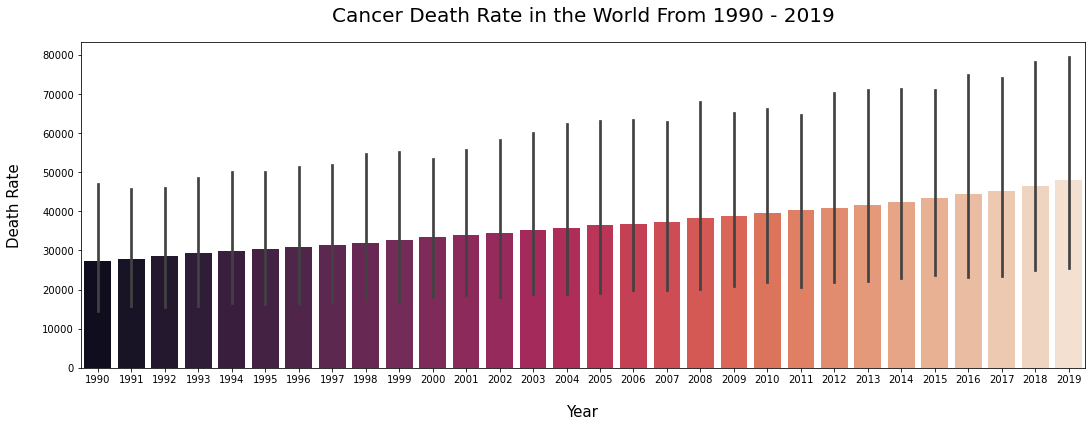

In [40]:
plt.figure(figsize=(18,6))
sb.barplot(World['Year'],World['Total'],palette='rocket')
plt.title('Cancer Death Rate in the World From 1990 - 2019',pad=float(20),fontdict={'fontsize':float(20),'fontweight':int(2)})
plt.xlabel('Year',labelpad=float(20),fontdict={'fontsize':float(15),'fontweight':int(2)})
plt.ylabel('Death Rate',labelpad=float(20),fontdict={'fontsize':float(15),'fontweight':int(2)})